In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline

In [2]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [26]:
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
paraiba = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]
joao_pessoa = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]

In [15]:
patos.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
4,2020-03-31,Patos,1,1,0,0,1
10,2020-04-01,Patos,1,1,0,0,0
17,2020-04-02,Patos,1,1,0,0,1
24,2020-04-03,Patos,1,1,0,0,0
31,2020-04-04,Patos,1,1,0,0,1


In [16]:
paraiba.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
5,2020-03-31,Paraíba,17,1,0,0,1
12,2020-04-01,Paraíba,20,1,0,3,0
19,2020-04-02,Paraíba,28,1,0,8,1
26,2020-04-03,Paraíba,30,1,0,2,0
35,2020-04-04,Paraíba,34,3,9,4,2


In [27]:
patos['data'] = pd.to_datetime(patos['data'])
joao_pessoa['data'] = pd.to_datetime(joao_pessoa['data'])
prop_novos_casos_patos = list(patos['novos_casos'].values*100/paraiba['novos_casos'].values)
prop_novos_casos_jp = list(joao_pessoa['novos_casos'].values*100/paraiba['novos_casos'].values)
patos['prop_nc'] = prop_novos_casos_patos
joao_pessoa['prop_nc'] = prop_novos_casos_jp

C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Macaubas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid d

In [21]:
patos = patos.loc[patos['data'] >= '2020-05-16']
joao_pessoa = joao_pessoa.loc[joao_pessoa['data'] >= '2020-05-16']
patos.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,prop_nc
2039,2020-05-16,Patos,234,13,0,15,4,4.629630
2174,2020-05-17,Patos,253,13,0,19,0,6.690141
2311,2020-05-18,Patos,298,14,0,45,0,10.250569
2453,2020-05-19,Patos,321,14,0,23,0,4.474708
2602,2020-05-20,Patos,359,15,0,38,1,7.063197


In [22]:
joao_pessoa.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos,prop_nc
2034,2020-05-16,João Pessoa,1540,71,0,62,4,19.135802
2169,2020-05-17,João Pessoa,1697,74,0,157,3,55.281690
2306,2020-05-18,João Pessoa,1799,77,0,102,3,23.234624
2448,2020-05-19,João Pessoa,1889,80,0,90,3,17.509728
2597,2020-05-20,João Pessoa,2088,82,0,199,2,36.988848


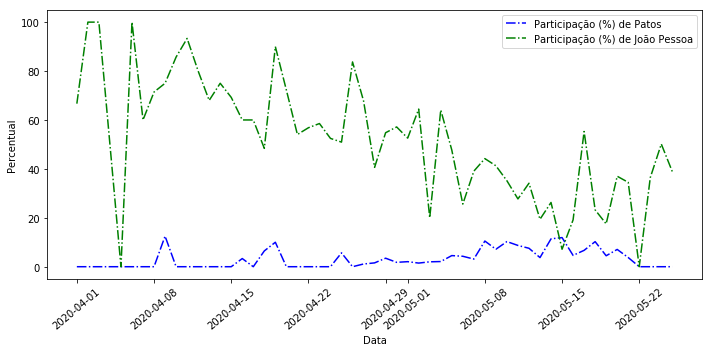

In [33]:
fig, ax = plt.subplots()
ax.plot(patos['data'], patos['prop_nc'], 'b-.', label = 'Participação (%) de Patos')
ax.plot(joao_pessoa['data'],joao_pessoa['prop_nc'], 'g-.', label = 'Participação (%) de João Pessoa') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual') # Nome do eixo y
#ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.xticks(rotation=40) # Gira as legendas do eixo X
plt.tight_layout() # Organiza o espaço
ax.legend(loc = 0)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig('partc_patos_jp.png')

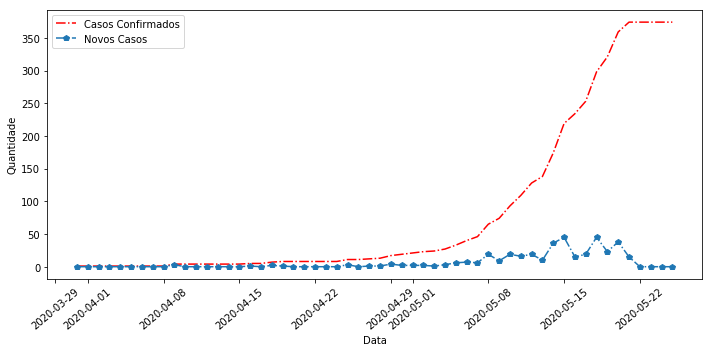

In [34]:
fig, ax = plt.subplots()
ax.plot(patos['data'], patos['confirmados'], 'r-.', label = 'Casos Confirmados')
ax.plot(patos['data'],patos['novos_casos'], 'p-.', label = 'Novos Casos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
#ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.xticks(rotation=40) # Gira as legendas do eixo X
plt.tight_layout() # Organiza o espaço
ax.legend(loc = 0)
plt.rcParams['figure.figsize'] = (10,5)
plt.savefig('conf_nc.png')